# Assignment 10, Part 2: Data Wrangling Practice
Use this notebook to follow along with the tasks in the `AO8-Data_Wrangling.ipynb` notebook.

## Instructions
For each task, use the cell below to write and test your code.  You may add additional cells for any task as needed or desired.  

## Task 1a: Setup


Import the following packages:
+ `pandas` as `pd`
+ `numpy` as `np`
+ `matplotlib.pyplot` as `plt`
+ `Seaborn` as `sns`

Activate the `%matplotlib inline` magic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Task 5a: Bring it all Together

You have been provided with two data files:
- `paired_genes.txt`: contains log2 transformed gene expression-levels of two genes from *Oryza sativa* (rice). The data contains 463 data points corresponding to samples of extracted RNA.
- `project_samples.txt`: contains the list of 463 samples and the experimental conditions underwhich the data was collected.  

The `project_samples.txt` file contains 6 variables:  
1. Sample ID
2. Treatment: CONTROL, HEAT, DROUGHT 
3. Time: a time series in minutes 
4. Genotype: one of 4 varities of rice
5. Subspecies: either Indica or  Japonica
6. Subtreatment: CONTORL, HEAT, RECOV_HEAT, DROUGHT or RECOV_DROUGHT

This data was obtained from [NCBI SRA Project PRJNA301554](https://www.ncbi.nlm.nih.gov/bioproject/PRJNA301554/)

Import both of these files and generate a scatterplot comparing the gene expression of the two genes. Color the points in the dataframe by the Subtreatment.  Remember to
1. Explore the data
2. Clean the data (if needed)
3. Reshape the data by combining both into a single data frame.
4. Plot the scatterplot using Seaborn and the new single data frame.

In [14]:
data = pd.read_csv('data3/project_samples.txt', delimiter = '\t' )
# data.columns = ['Sample_ID','Treatment','Control','Genotype','Subspecies','Subtreatment' ]
data.head()

,Sample,Treatment,Time,Genotype,Subspecies,Subtreatment
0,SRR2931040,CONTROL,15,AZ,Japonica,CONTROL
1,SRR2931041,CONTROL,15,AZ,Japonica,CONTROL
2,SRR2931042,CONTROL,30,AZ,Japonica,CONTROL
3,SRR2931043,CONTROL,30,AZ,Japonica,CONTROL
4,SRR2931044,CONTROL,45,AZ,Japonica,CONTROL


In [15]:
data.dtypes

Sample          object
Treatment       object
Time             int64
Genotype        object
Subspecies      object
Subtreatment    object
dtype: object

In [40]:
data2 = pd.read_csv('paired_genes.txt', header = None, delimiter = '\t')
data2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,453,454,455,456,457,458,459,460,461,462
0,Gene,SRR2931040,SRR2931041,SRR2931042,SRR2931043,SRR2931044,SRR2931045,SRR2931046,SRR2931047,SRR2931048,...,SRR2931504,SRR2931505,SRR2931506,SRR2931507,SRR2931509,SRR2931510,SRR2931511,SRR2931512,SRR2931513,SRR2931514
1,LOC_Os04g28420.1,4.26804020370806,4.11695780004887,4.01229253276611,2.28800382529042,3.46556549062611,4.22635045664437,2.00069917697174,3.83296989169989,3.27137607139244,...,2.5663319833285,1.05584395762672,2.40594336165372,0.933890600399057,-0.717344325843489,1.680052897575,0.460851580767258,2.75420082966645,3.08929441001553,2.50210371460654
2,LOC_Os02g28980.1,5.14154245218513,4.87950669591621,5.02993151079836,4.33143264347616,4.28108573498835,5.03673519250893,4.17165279596939,4.99537217423753,4.78952300322125,...,4.43103459723222,3.69990471202251,3.68095070161688,3.69254046216657,3.46867402018515,3.79905984071301,3.65744587993084,3.43753656938961,4.47883244560646,4.36638159959761


In [42]:
data3 = data2.transpose()
data3.head()

,0,1,2
0,Gene,LOC_Os04g28420.1,LOC_Os02g28980.1
1,SRR2931040,4.26804020370806,5.14154245218513
2,SRR2931041,4.11695780004887,4.87950669591621
3,SRR2931042,4.01229253276611,5.02993151079836
4,SRR2931043,2.28800382529042,4.33143264347616


In [43]:
data3.columns = ['Sample_ID','LOC_Os04g28420.1','LOC_Os02g28980.1']
data3.head()

,Sample_ID,LOC_Os04g28420.1,LOC_Os02g28980.1
0,Gene,LOC_Os04g28420.1,LOC_Os02g28980.1
1,SRR2931040,4.26804020370806,5.14154245218513
2,SRR2931041,4.11695780004887,4.87950669591621
3,SRR2931042,4.01229253276611,5.02993151079836
4,SRR2931043,2.28800382529042,4.33143264347616


In [44]:
data4 = data3.drop(data3.index[0])
data4.head()

,Sample_ID,LOC_Os04g28420.1,LOC_Os02g28980.1
1,SRR2931040,4.26804020370806,5.14154245218513
2,SRR2931041,4.11695780004887,4.87950669591621
3,SRR2931042,4.01229253276611,5.02993151079836
4,SRR2931043,2.28800382529042,4.33143264347616
5,SRR2931044,3.46556549062611,4.28108573498835


In [46]:
data4.reset_index(inplace=True)
data4.head()

,index,Sample_ID,LOC_Os04g28420.1,LOC_Os02g28980.1
0,1,SRR2931040,4.26804020370806,5.14154245218513
1,2,SRR2931041,4.11695780004887,4.87950669591621
2,3,SRR2931042,4.01229253276611,5.02993151079836
3,4,SRR2931043,2.28800382529042,4.33143264347616
4,5,SRR2931044,3.46556549062611,4.28108573498835


In [51]:
data5 = data4.drop('index',1)
data5.head()

,Sample_ID,LOC_Os04g28420.1,LOC_Os02g28980.1
0,SRR2931040,4.26804020370806,5.14154245218513
1,SRR2931041,4.11695780004887,4.87950669591621
2,SRR2931042,4.01229253276611,5.02993151079836
3,SRR2931043,2.28800382529042,4.33143264347616
4,SRR2931044,3.46556549062611,4.28108573498835


In [57]:
data5.dtypes

Sample_ID           object
LOC_Os04g28420.1    object
LOC_Os02g28980.1    object
dtype: object

In [63]:
data5['LOC_Os04g28420.1'] =data5['LOC_Os04g28420.1'].astype(float)

In [62]:
data5['LOC_Os02g28980.1'] =data5['LOC_Os02g28980.1'].astype(float)

In [103]:
data_merged = pd.concat([data, data5], ignore_index = False, verify_integrity= True, axis = 1)
data_merged = data_merged.drop_duplicates()
data_merged.head()

,Sample,Treatment,Time,Genotype,Subspecies,Subtreatment,Sample_ID,LOC_Os04g28420.1,LOC_Os02g28980.1
0,SRR2931040,CONTROL,15,AZ,Japonica,CONTROL,SRR2931040,4.268040,5.141542
1,SRR2931041,CONTROL,15,AZ,Japonica,CONTROL,SRR2931041,4.116958,4.879507
2,SRR2931042,CONTROL,30,AZ,Japonica,CONTROL,SRR2931042,4.012293,5.029932
3,SRR2931043,CONTROL,30,AZ,Japonica,CONTROL,SRR2931043,2.288004,4.331433
4,SRR2931044,CONTROL,45,AZ,Japonica,CONTROL,SRR2931044,3.465565,4.281086


In [104]:
data_merged2 = data_merged.drop('Sample_ID',1)
data_merged2.head()

,Sample,Treatment,Time,Genotype,Subspecies,Subtreatment,LOC_Os04g28420.1,LOC_Os02g28980.1
0,SRR2931040,CONTROL,15,AZ,Japonica,CONTROL,4.268040,5.141542
1,SRR2931041,CONTROL,15,AZ,Japonica,CONTROL,4.116958,4.879507
2,SRR2931042,CONTROL,30,AZ,Japonica,CONTROL,4.012293,5.029932
3,SRR2931043,CONTROL,30,AZ,Japonica,CONTROL,2.288004,4.331433
4,SRR2931044,CONTROL,45,AZ,Japonica,CONTROL,3.465565,4.281086


In [106]:
data_merged2 = data_merged2.rename(columns={'Sample':'Sample_ID'})
data_merged2.head()

,Sample_ID,Treatment,Time,Genotype,Subspecies,Subtreatment,LOC_Os04g28420.1,LOC_Os02g28980.1
0,SRR2931040,CONTROL,15,AZ,Japonica,CONTROL,4.268040,5.141542
1,SRR2931041,CONTROL,15,AZ,Japonica,CONTROL,4.116958,4.879507
2,SRR2931042,CONTROL,30,AZ,Japonica,CONTROL,4.012293,5.029932
3,SRR2931043,CONTROL,30,AZ,Japonica,CONTROL,2.288004,4.331433
4,SRR2931044,CONTROL,45,AZ,Japonica,CONTROL,3.465565,4.281086


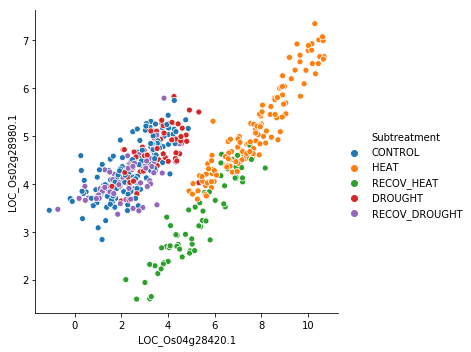

In [107]:
sns.relplot(x = 'LOC_Os04g28420.1', y = 'LOC_Os02g28980.1', hue = "Subtreatment",  data=data_merged);